Guarav Goyal, Daniel Gonzalez

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf

LOAD THE DATA INTO A DATAFRAME

In [2]:
df = pd.read_csv('kc_house_data.csv')

TAKE A BEGINNER LOOK AT THE DATA

In [3]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062


CHECK DATA TYPES

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

AM I MISSING ANY DATA?

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

LET'S TAKE A CLOSER LOOK AT BEDROOMS

In [6]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [7]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

WE CAN PRINT SOME SUMMARY STATISTICS

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


WE CAN PERFORM A CROSSTABULATION TO SEE RELATIONSHIPS BETWEEN DATA

In [9]:
tab = pd.crosstab(df['bedrooms'], df['bathrooms'])
tab

bathrooms,0.00,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,...,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.50,7.75,8.00
bedrooms,,,,,,,,,,,,,,,,,,,,,
0,7,0,1,1,0,1,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,3,1,27,138,2,12,4,6,4,2,...,0,0,0,0,0,0,0,0,0,0
2,0,2,26,1558,3,294,304,216,118,197,...,0,0,0,0,0,0,0,0,0,0
3,0,0,16,1780,4,829,1870,1048,1082,2357,...,0,0,0,0,0,0,0,0,0,0
4,0,1,2,325,0,254,719,525,709,2502,...,5,5,1,0,0,0,0,0,0,0
5,0,0,0,43,0,48,134,110,116,287,...,4,4,2,4,2,1,1,0,0,0
6,0,0,0,6,0,6,16,24,15,29,...,3,0,0,1,0,1,0,0,1,1
7,0,0,0,1,0,2,0,0,3,2,...,0,1,1,0,0,0,1,0,0,1
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


Nathan Holmes-King

LET'S LOOK AT THE RELATIONSHIP BETWEEN CONTINUOUS VARIABLES

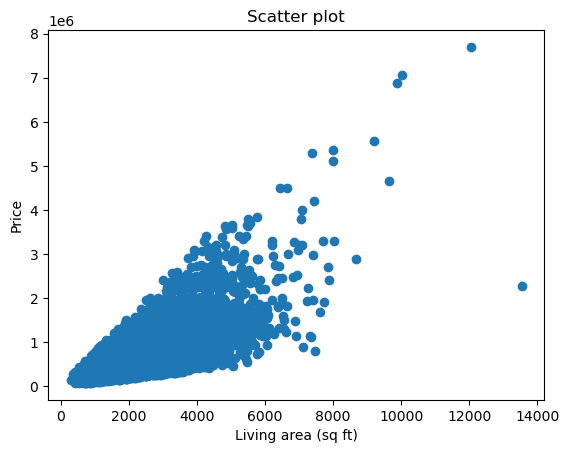

In [10]:
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('Living area (sq ft)')
plt.ylabel('Price')
plt.title('Scatter plot')
plt.show()

WE CAN LOOK AT A FREQUENCY GRAPH OF HOUSES BY YEAR BUILT

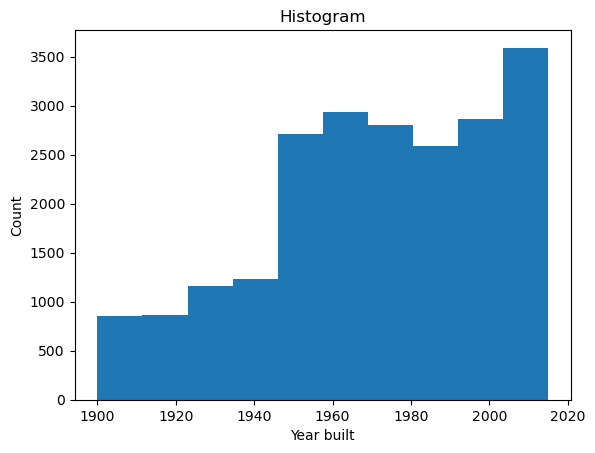

In [11]:
plt.hist(df['yr_built'])
plt.xlabel('Year built')
plt.ylabel('Count')
plt.title('Histogram')
plt.show()

WE CAN ADD COLOR FOR A THIRD DIMENSION

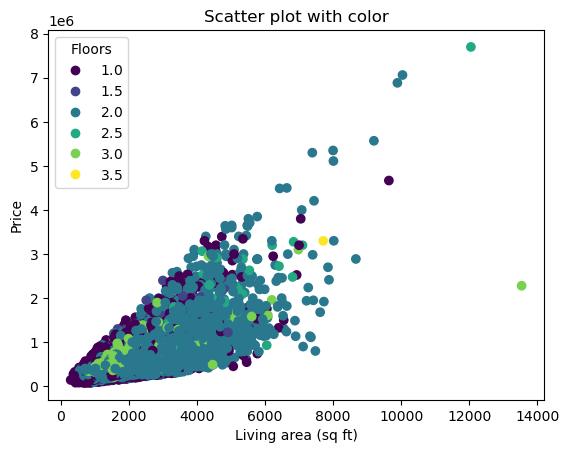

In [12]:
fig, ax = plt.subplots()
sc = ax.scatter(df['sqft_living'], df['price'], c=df['floors'])
ax.set_xlabel('Living area (sq ft)')
ax.set_ylabel('Price')
ax.legend(*sc.legend_elements(), title='Floors')
ax.set_title('Scatter plot with color')
plt.show()

ADD A REGRESSION LINE

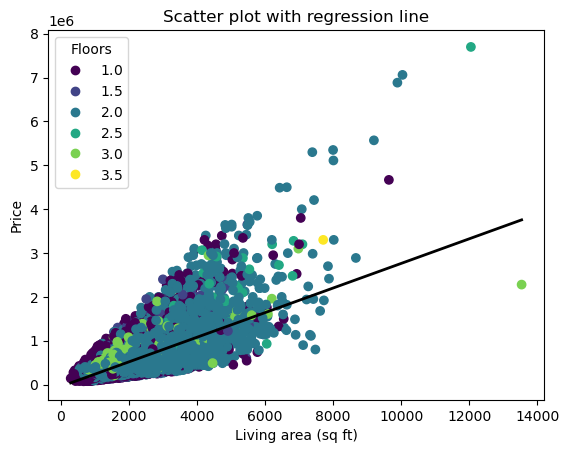

In [13]:
fig, ax = plt.subplots()
sc = ax.scatter(df['sqft_living'], df['price'], c=df['floors'])
ax.set_xlabel('Living area (sq ft)')
ax.set_ylabel('Price')
ax.legend(*sc.legend_elements(), title='Floors')
b1, b0 = np.polyfit(df['sqft_living'], df['price'], deg = 1)
wv = np.linspace(df['sqft_living'].min(), df['sqft_living'].max(), num = 10)
ax.plot(wv, b0 + b1 * wv, color = '#000', lw = 2)
ax.set_title('Scatter plot with regression line')
plt.show()

Ryan Bernstein

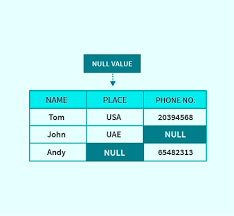

In [14]:
df[df['sqft_above'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,1736800520,20150403T000000,662500.0,3,2.5,3560,9796,1.0,0,0,...,8,NaN,1700,1965,0,98007,47.6007,-122.145,2210,8925
17,6865200140,20140529T000000,485000.0,4,1.0,1600,4300,1.5,0,0,...,7,NaN,0,1916,0,98103,47.6648,-122.343,1610,4300


### Fill in the null values appropriately. sqft_above = sqft_living - basement

In [15]:
df.at[10, 'sqft_above'] = (3560-1700)
df.at[17, 'sqft_above'] = (1600)
df[df['sqft_above'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


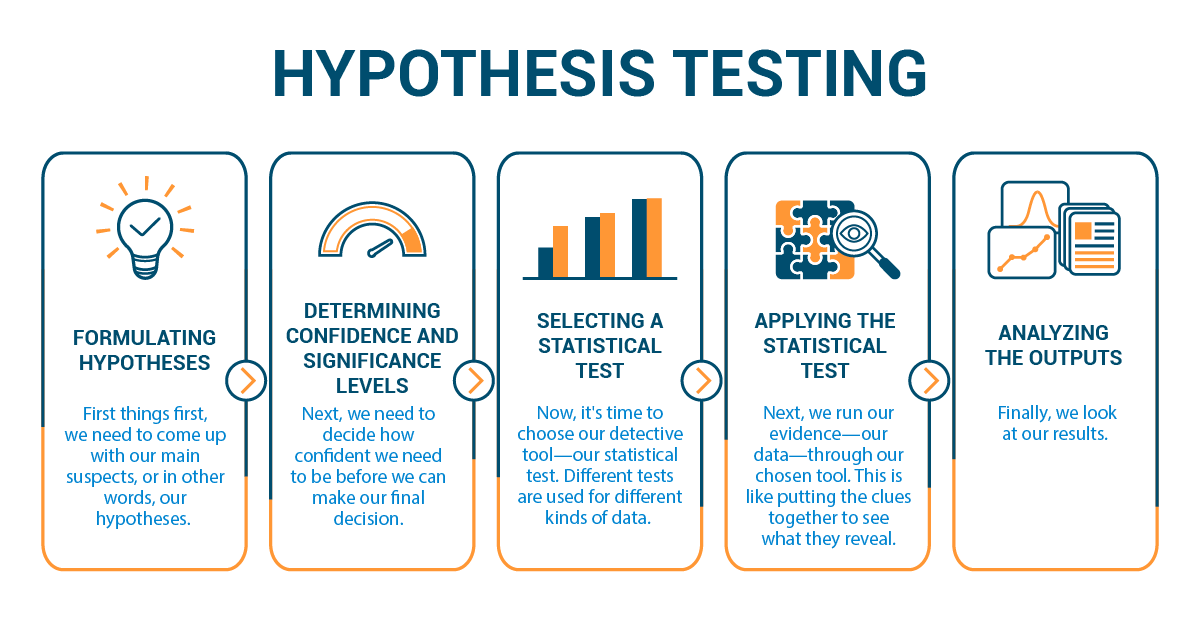

### Partial F-Test

In [16]:
model = smf.ols('price ~ sqft_above', df).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
sqft_above,1.0,1.068201e+15,1.068201e+15,12514.060897,0.0
Residual,21611.0,1.844716e+15,8.536005e+10,NaN,NaN


### T-Test

In [17]:
group1 = df[df['waterfront'] == 0]['price']
group2 = df[df['waterfront'] == 1]['price']

t_statistic, p_value = ttest_ind(group1, group2, equal_var=False)
round(p_value, 3)

0.0

# Create New Column

In [18]:
df.iloc[:, :11].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3


In [19]:
df.iloc[:, 11:21].head()

,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


### Come Up With New Column

In [20]:
df['sqft_non_living'] = df['sqft_lot']-df['sqft_living']

### New Column Appears at End of Table

In [21]:
df.iloc[:, 17:22].head()

,lat,long,sqft_living15,sqft_lot15,sqft_non_living
0,47.5112,-122.257,1340,5650,4470
1,47.7210,-122.319,1690,7639,4672
2,47.7379,-122.233,2720,8062,9230
3,47.5208,-122.393,1360,5000,3040
4,47.6168,-122.045,1800,7503,6400
